In [49]:
import os, sys, re, cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['image.cmap'] = 'gray'
import matplotlib.backends.backend_pdf
from matplotlib.patches import Rectangle

import numpy as np
from numpy import flip, arange, reshape

import seaborn as sns
import pandas as pd
import glob

import scipy
from scipy.signal import correlate2d, fftconvolve
from scipy import ndimage
from scipy.ndimage import maximum_filter
from scipy.spatial import distance_matrix, Delaunay, Voronoi, voronoi_plot_2d

import math
from PIL import Image

from sklearn.manifold import TSNE
from sklearn import metrics
from sklearn.cluster import DBSCAN, HDBSCAN

import pointpats

from render2D import grid2D

from utils import *

## Simulation functions

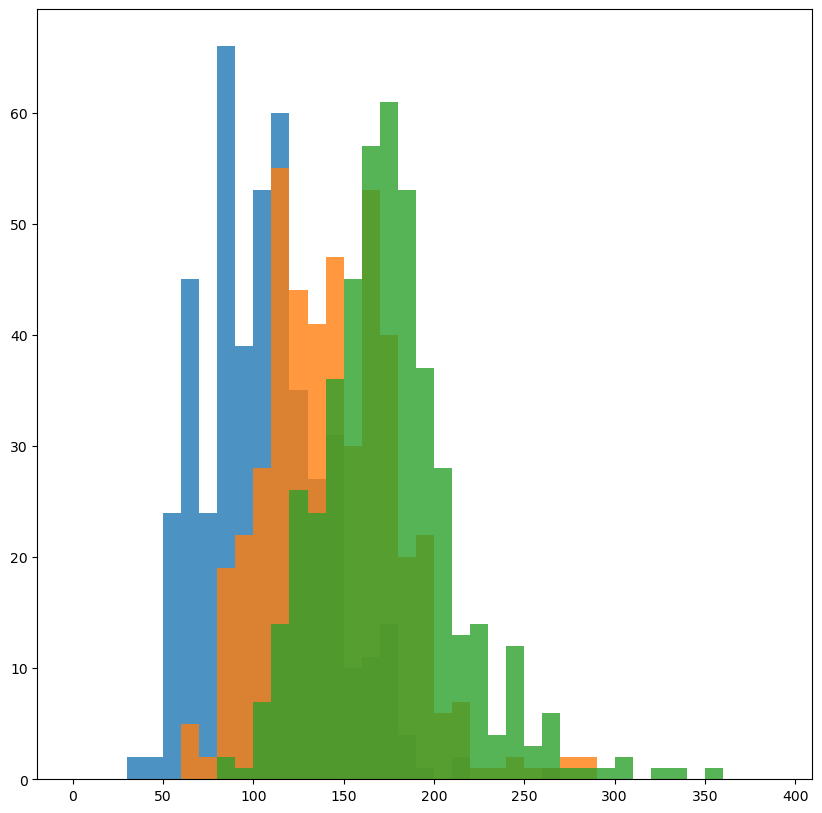

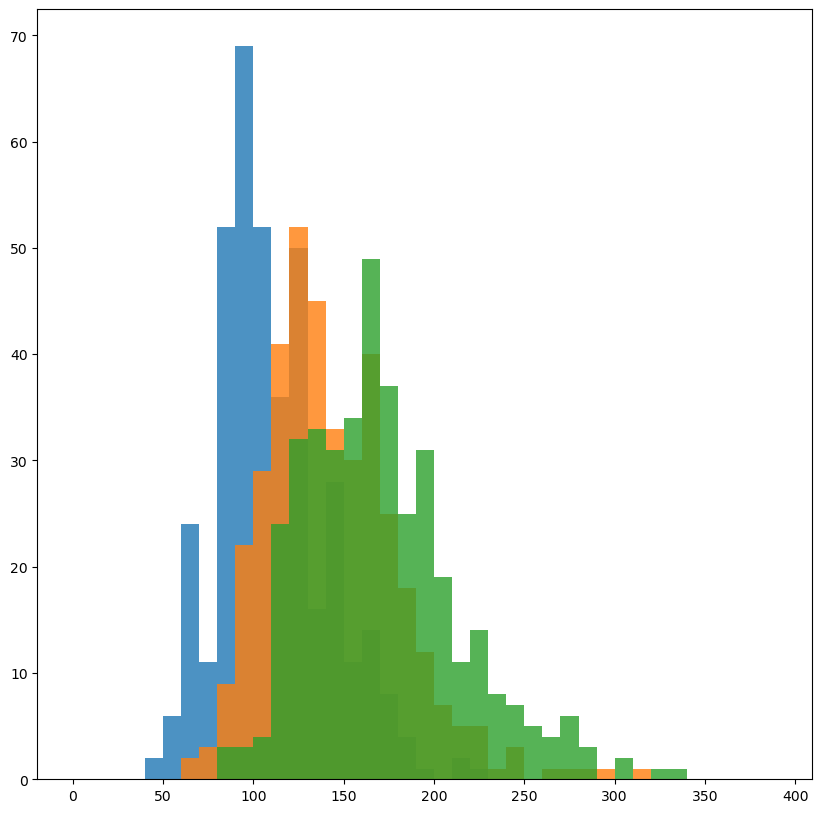

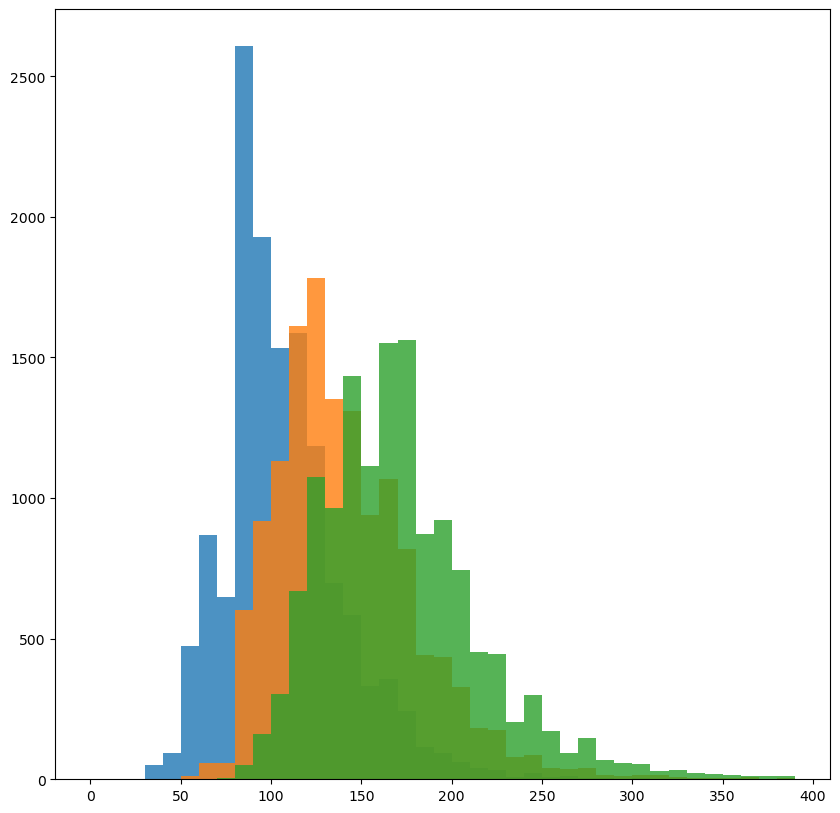

In [38]:
test_1d=glob.glob("../data/rendered/soma/1D/*.txt")
test_2d=glob.glob("../data/rendered/soma/2D/*.txt")
test_rand=glob.glob("../data/rendered/soma/Rand/*.txt")
a_1d=[]
a_2d=[]
a_un=[]
stats_2dr=[]
stats_randr=[]
thre=[100,220]
#devs=[]
for test in [test_1d, test_2d, test_rand]:
    tmp_devs = []
    dists=[[] for i in range(3)]
    for i in range(len(test)):
        vxs = 16*readVXSfromLoc(test[i])
        dist = distance_matrix(vxs, vxs)
        s_dist = np.sort(dist,axis=1)
        for j in range(3):
            dists[j].extend([s_dist[x,j+1] for x in range(len(vxs))])
    plt.figure(figsize=[10,10])
    for i in range(3):
        plt.hist(dists[i],bins=range(0,400,10),alpha=0.8)
        #links = generateLinks(vxs*16, thre=thre, plot=0)
        #angles = getAngle(vxs, links)
        #a.extend(angles)
        #tmp_devs.append(calAngleDev(angles))
    #devs.append(tmp_devs)


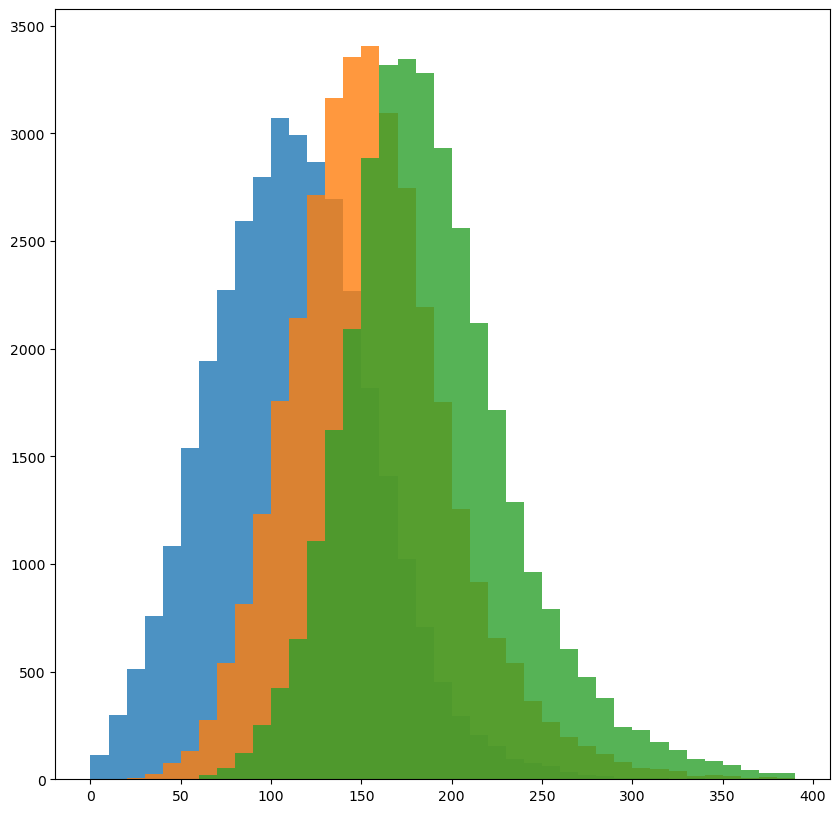

In [64]:
#vxs = sim2Df()
dists=[[] for i in range(3)]
for i in range(len(test_rand)):
    vxs = sim2Df(64*16, 170/2)
    vxs=jitter(vxs, rand=130, loss=10, noise=20)
    dist = distance_matrix(vxs, vxs)
    s_dist = np.sort(dist,axis=1)
    for j in range(3):
        dists[j].extend([s_dist[x,j+1] for x in range(len(vxs))])
plt.figure(figsize=[10,10])
for i in range(3):
    plt.hist(dists[i],bins=range(0,400,10),alpha=0.8)

c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


nan
nan
nan


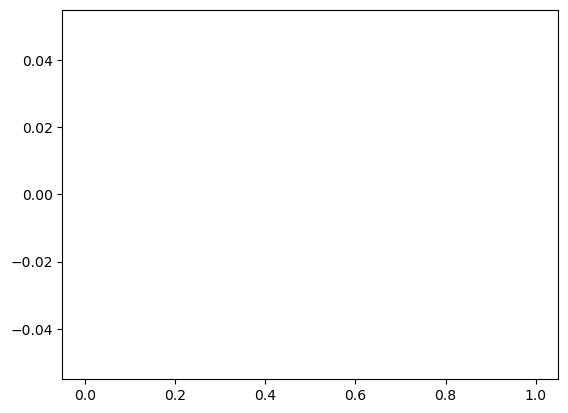

In [156]:
# thre [100,220]
for angles in [a_1d,a_2d, a_un]:
    #plotAngleHist(angles,bins=72)
    plt.hist(angles,bins=72)
    print(calAngleDev(angles))


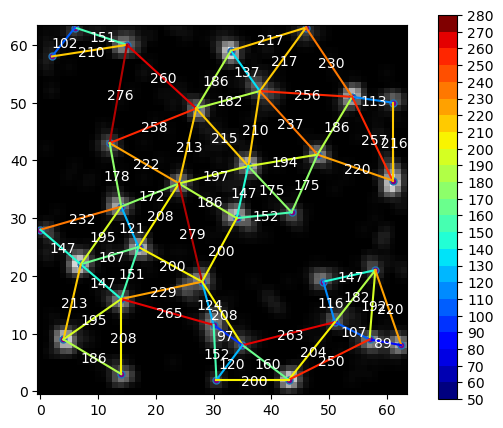

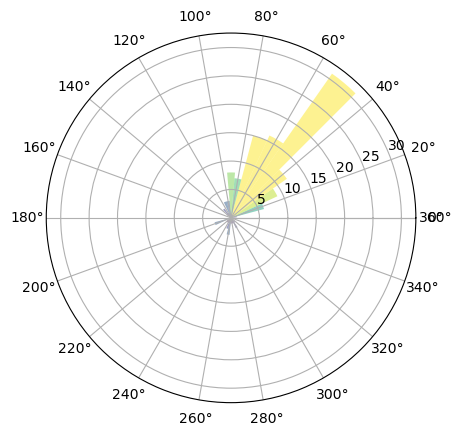

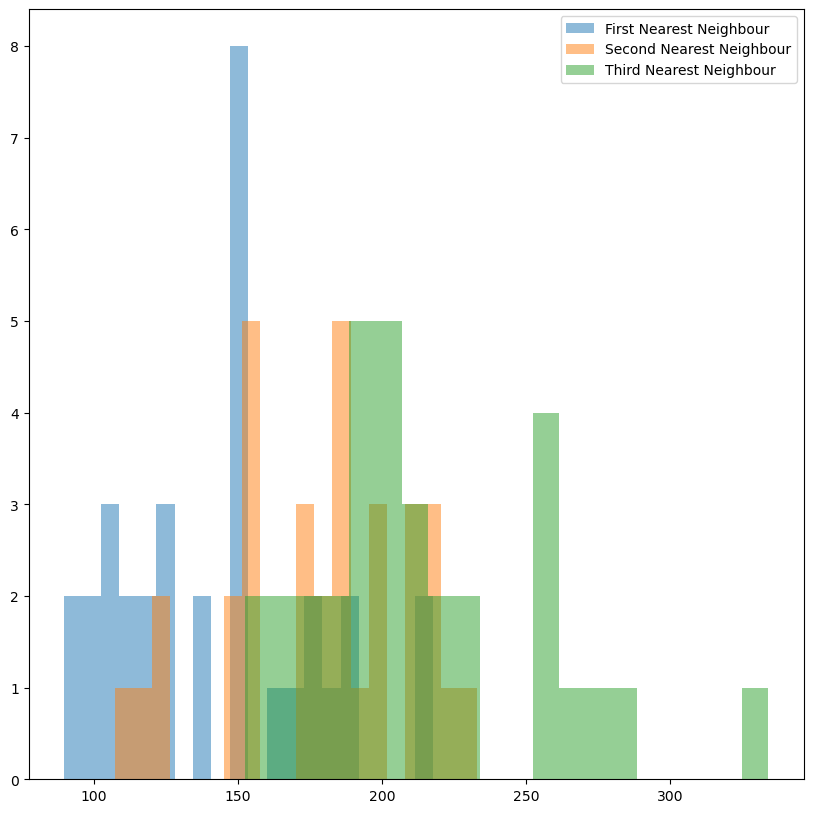

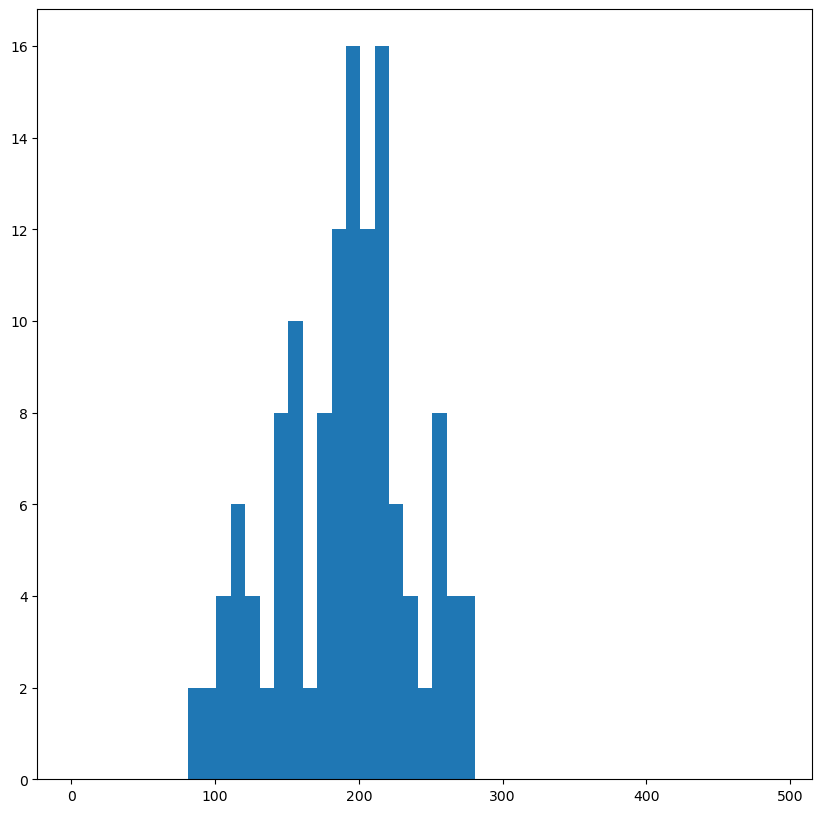

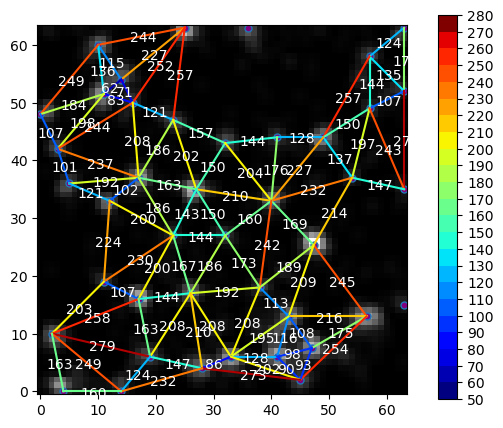

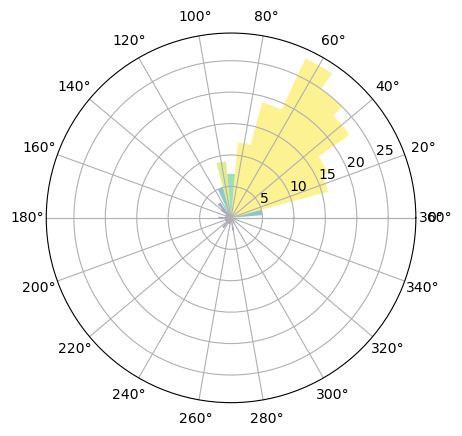

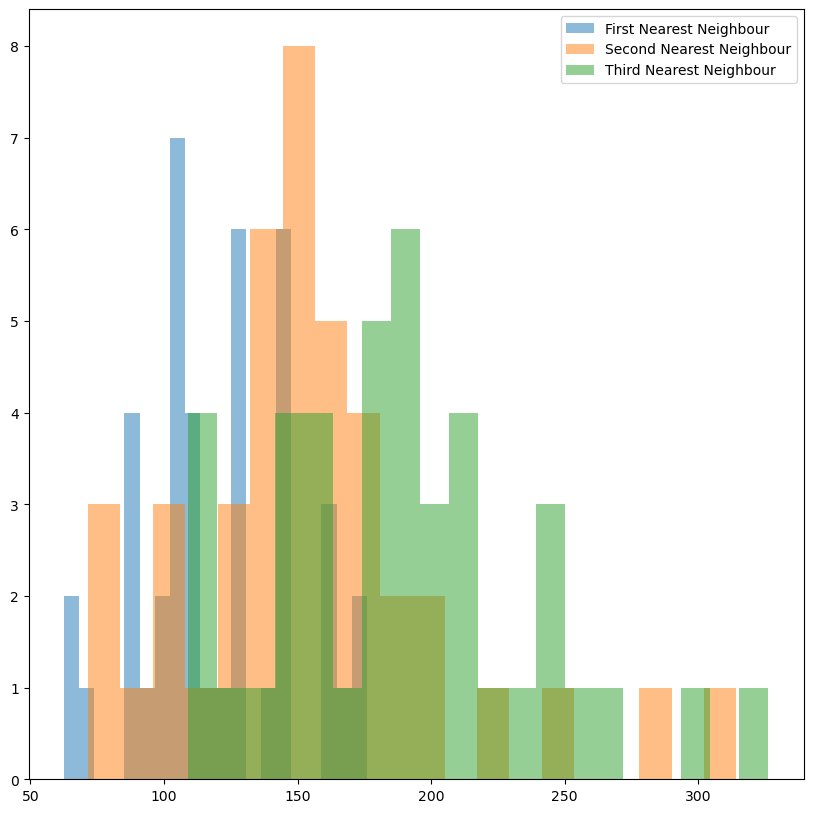

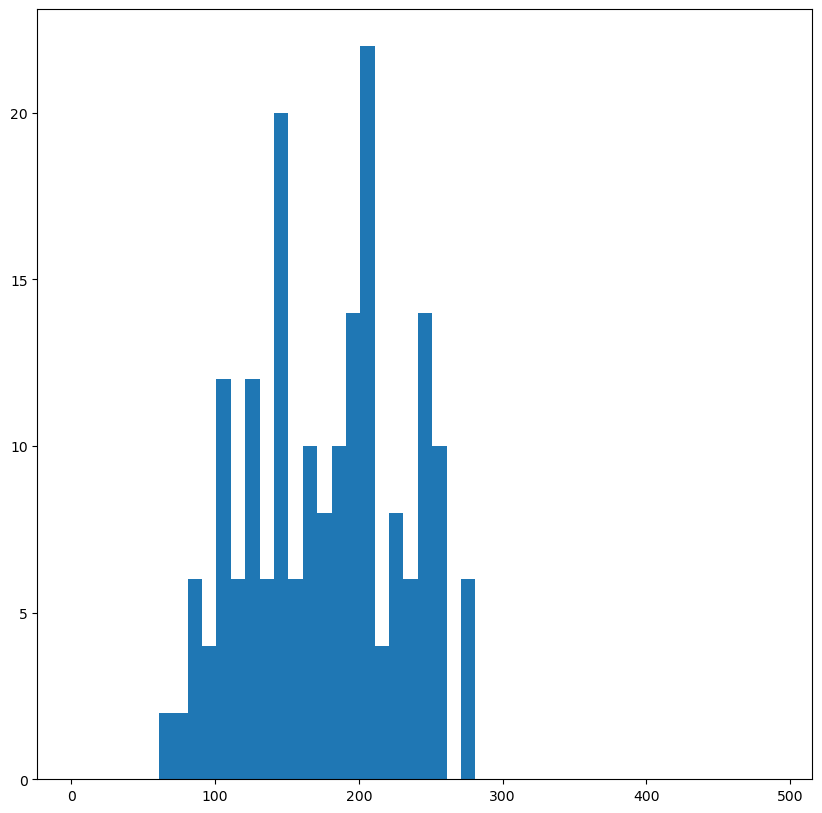

In [120]:
p_size = 16
thre=[50,280]
test_2d=glob.glob("../data/rendered/soma/2D/*.txt")
for i in range(2):
    plt.figure()
    vxs = readVXSfromLoc(test_2d[i],plot=1)
    links = generateLinks(vxs*p_size, thre=thre,plot=0)
    visualize(vxs, links, thre=thre, bins=10, p_size=p_size)
    plt.figure()
    angles=getAngle(vxs, links)
    plotAngleHist(angles)
    histKNN(vxs*16,plot=1)
    histLinks(vxs*16, links, bins=range(1,500,10))


    #stats_2dr.append(statsForVXS(vxs*16, plot=1, thre=thre))

In [3]:
g = cv2.getGaussianKernel(3, sigma=1)
kernel = g*g.T
grid_size=64
test_1d=glob.glob("../data/rendered/soma/1D/*.txt")
test_2d=glob.glob("../data/rendered/soma/2D/*.txt")
test_rand=glob.glob("../data/rendered/soma/Rand/*.txt")
stats_1dr=[]
stats_2dr=[]
stats_randr=[]
# stats_1ds=[]
# stats_2ds=[]
# stats_rands=[]
thre=[0,280]
#thre=[100,280]
for i in range(len(test_1d)):
    vxs = readVXSfromLoc(test_1d[i])
    stats_1dr.append(statsForVXS(vxs*16, plot=0, thre=thre))

for i in range(len(test_2d)):
    vxs = readVXSfromLoc(test_2d[i])
    stats_2dr.append(statsForVXS(vxs*16, plot=0, thre=thre))

# for i in range(len(test_rand)):
#     vxs = readVXSfromLoc(test_rand[i]ii)
#     stats_randr.append(statsForVXS(vxs*16, plot=0, thre=thre))

# stats_rands=[]
# for i in range(200):
#     vxs = simRand(size=64*16, n=45+np.random.randint(15))
#     stats_rands.append(statsForVXS(vxs, mode=1, plot=0, thre=thre))
# stats_rand2s=[]

# for i in range(200):
#     vxs = simRand2(size=64*16, n=45+np.random.randint(15))
#     stats_rand2s.append(statsForVXS(vxs, mode=1, plot=0, thre=thre))

# for i in range(len(test_rand)):    
#     vxs = readVXSfromLoc(test_rand[i])
#     counts = len(vxs)
#     for j in range(10):
#         vxs = np.random.rand(counts,2)*64*16
#         stats_rands.append(statsForVXS(vxs, plot=0, thre=thre))

c:\Users\yxt5273\.conda\envs\jupyter\Lib\site-packages\seaborn\categorical.py:3399: UserWarning: 9.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


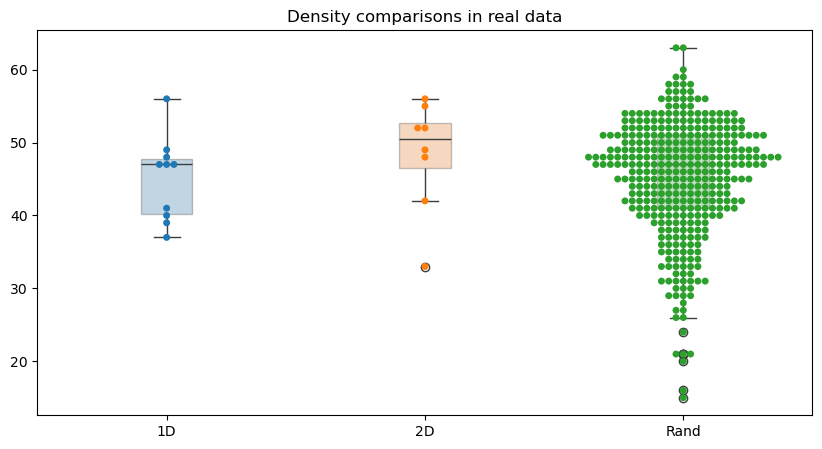

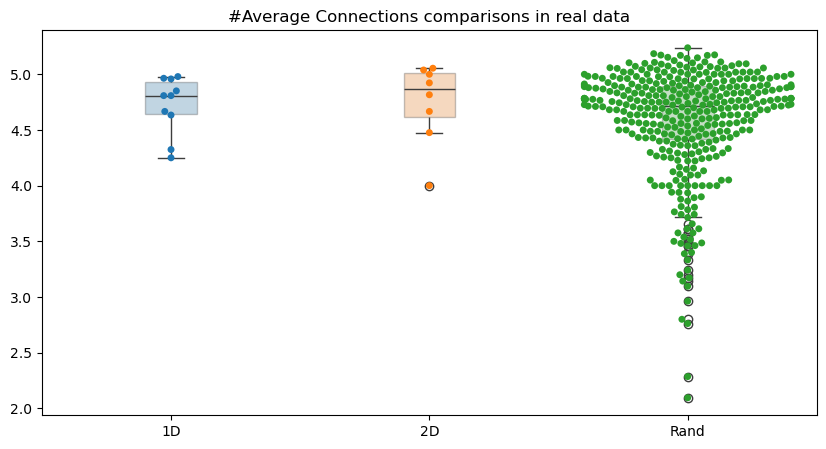

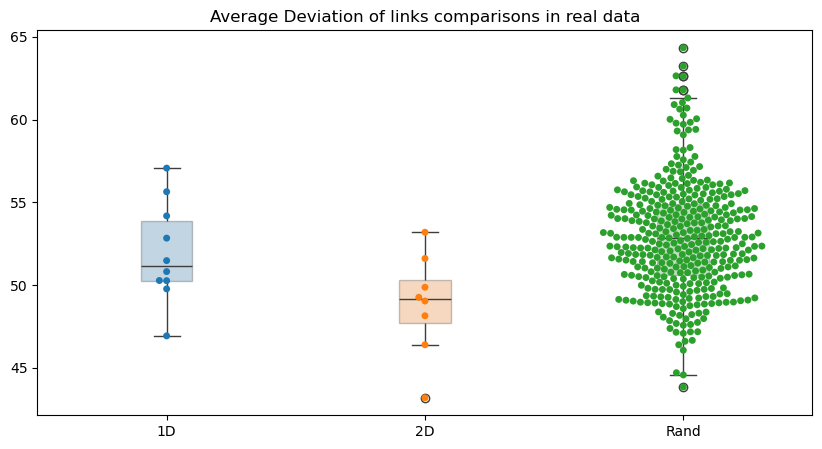

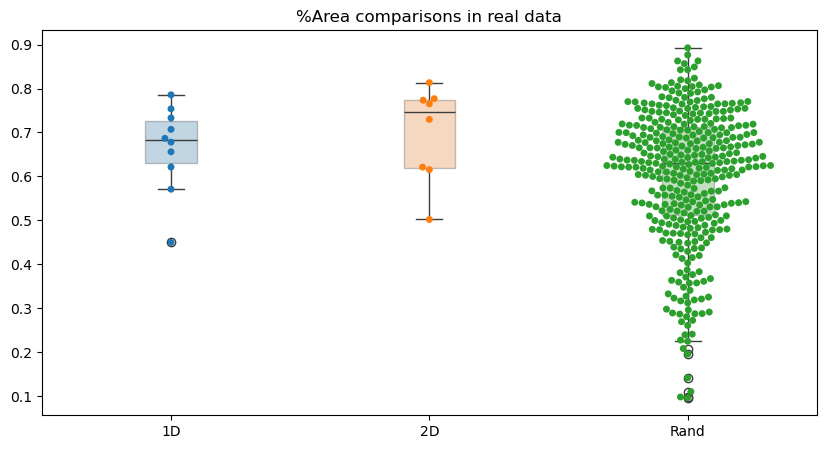

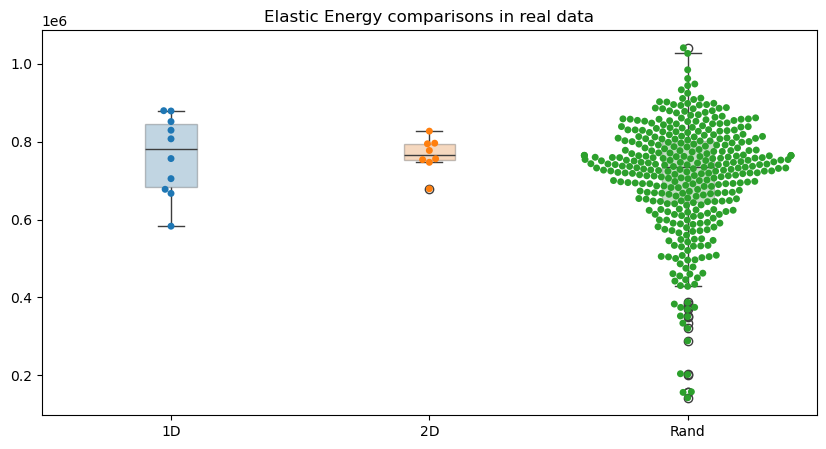

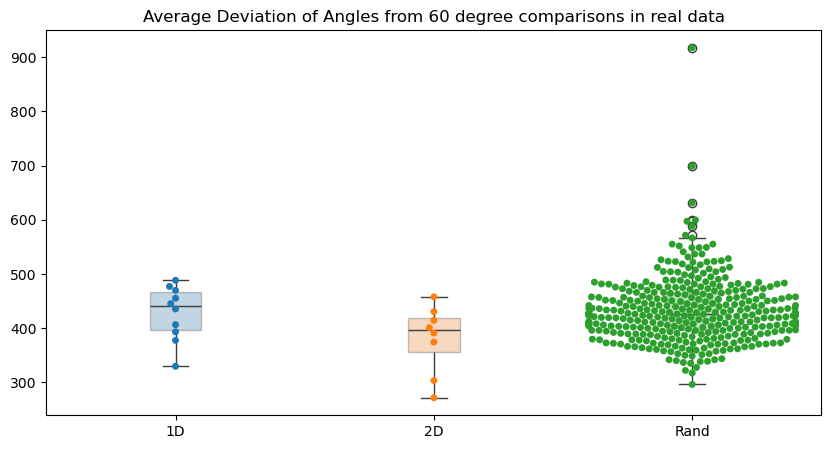

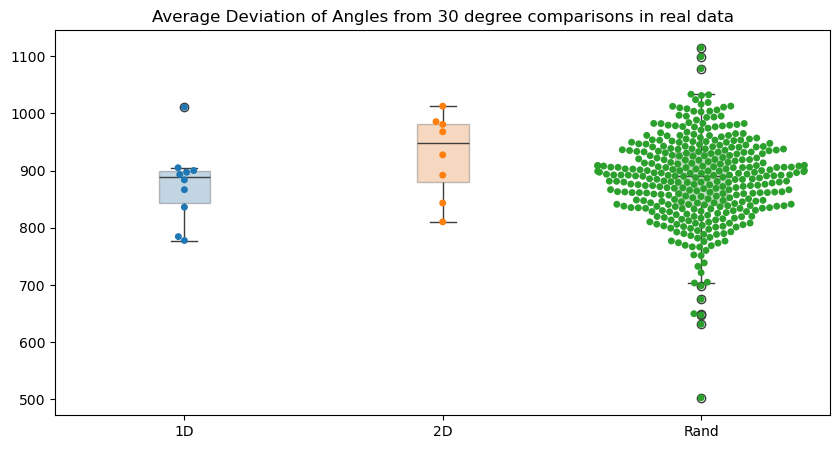

In [141]:
labels=["Density", "#Average Connections", "Average Deviation of links", "%Area","Elastic Energy", "Average Deviation of Angles from 60 degree", "Average Deviation of Angles from 30 degree"]
for i in range(7):
    plt.figure(figsize=[10,5])
    df = pd.Series(np.array(stats_1dr)[:,i], name="1D").to_frame().join(pd.Series(np.array(stats_2dr)[:,i], name="2D"), how="outer")
    df = df.join(pd.Series(np.array(stats_randr)[:,i], name="Rand"), how="outer")
    #df = df.join(pd.Series(np.array(stats_1ds)[:,i], name="Simulated 1D"), how="outer")
    #df = df.join(pd.Series(np.array(stats_2ds)[:,i], name="Simulated 2D"))
    #df = df.join(pd.Series(np.array(stats_rands)[:,i], name="Simulated Rand"))

    sns.boxplot(data=df, width = 0.2, boxprops=dict(alpha=.3)) 
    sns.swarmplot(data=df)
    plt.title(labels[i]+" comparisons in real data")

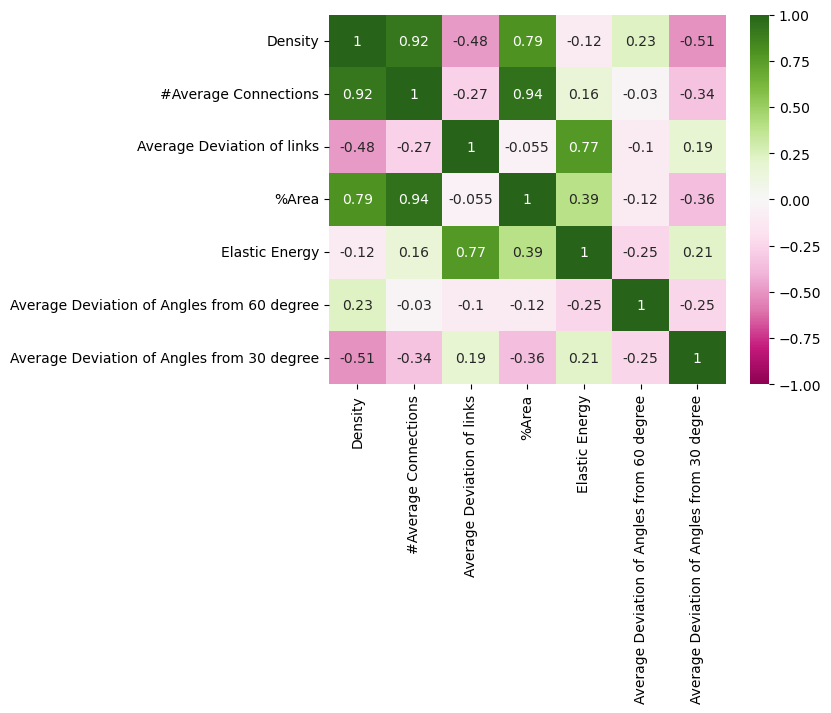

In [25]:
labels=["Density", "#Average Connections", "Average Deviation of links", "%Area","Elastic Energy", "Average Deviation of Angles from 60 degree", "Average Deviation of Angles from 30 degree"]
_=showCorr(stats_1dr, labels, method="spearman")

### PCA

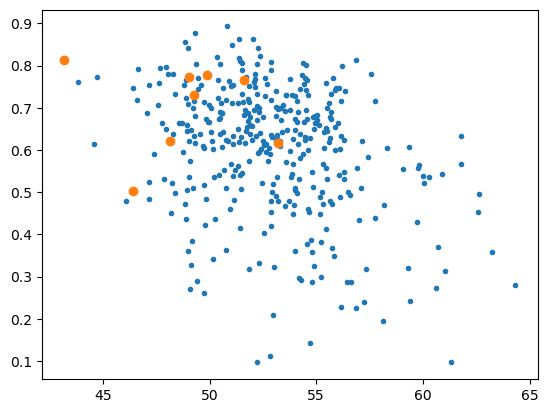

In [145]:
plt.scatter(np.array(stats_randr)[:,2],np.array(stats_randr)[:,3],marker=".")
plt.scatter(np.array(stats_2dr)[:,2],np.array(stats_2dr)[:,3],marker="o")
# plt.scatter(np.array(a)[:,2],np.array(a)[:,3],marker="o")
# plt.legend(["Uncategorized","2D","Filtered"])
# plt.xlabel(labels[2])
# plt.ylabel(labels[3])

In [137]:
a = [ x for x in stats_randr if x[3] > 0.5 and x[2] < 40 ]
len(a)

8

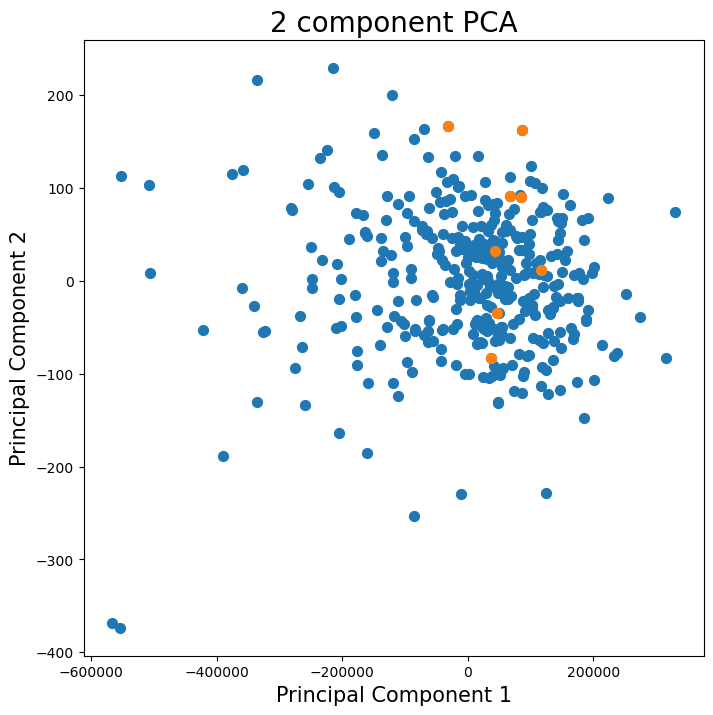

In [154]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=2)

# principalComponents = pca.fit_transform(stats_randr)

# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['PCA1', 'PCA2'])

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

ax.scatter(principalDf['PCA1'], principalDf['PCA2'] , s = 50)

ax.scatter(principalDf['PCA1'][-8:],principalDf['PCA2'][-8:],s=50)

In [43]:
loc=test_2d[0]

smlm = pd.read_csv(loc, header=0)
xc = np.array(smlm["Xc"].tolist()).astype(np.int32)
yc = np.array(smlm["Yc"].tolist()).astype(np.int32)
img = grid2D(
    np.zeros([grid_size, grid_size], dtype=np.int32),
    xc,
    yc,
    grid_size,
    grid_size,
    len(xc),
)
g = cv2.getGaussianKernel(3, sigma=1)
kernel = g * g.T
nimg = scipy.signal.fftconvolve(img, kernel, mode="same")

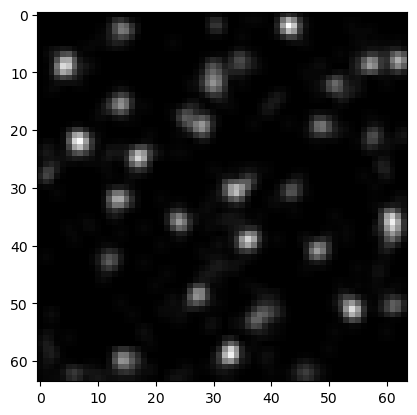

In [119]:
def readVXSfromLoc(loc, grid_size=64, plot=0, sm=3, **loc_args):
    smlm = pd.read_csv(loc, header=0)
    xc = np.array(smlm["Xc"].tolist()).astype(np.int32)
    yc = np.array(smlm["Yc"].tolist()).astype(np.int32)
    img = grid2D(
        np.zeros([grid_size, grid_size], dtype=np.int32),
        xc,
        yc,
        grid_size,
        grid_size,
        len(xc),
    )
    g = cv2.getGaussianKernel(3, sigma=1)
    kernel = g * g.T
    nimg = scipy.signal.fftconvolve(img, kernel, mode="same")
    if plot == 1:
        plt.imshow(nimg)
    return lmax_loc(None, None, nimg, adapt=55, local=5, sm=sm, plot=0, **loc_args)[1:]

def lmax_loc(
    loc_file, regions, rimg, adapt=55, local=7, plot=0, verbose=0, sm=4, mode="full"
):
    if loc_file is not None:
        smlm = pd.read_table(loc_file, header=0)
        test = smlm[["Xc", "Yc", "Zc"]]
        img = np.zeros(
            [regions[1] - regions[0], regions[3] - regions[2]], dtype=np.int32
        )

        xc = test["Xc"].tolist()
        yc = test["Yc"].tolist()
        xc = np.array([int(x * 10 - regions[0]) for x in xc]).astype(np.int32) - 5
        yc = np.array([int(x * 10 - regions[2]) for x in yc]).astype(np.int32) - 5
        img = grid2D(
            img, xc, yc, regions[1] - regions[0], regions[3] - regions[2], len(xc)
        )
        img = np.array(img)
    else:
        if len(rimg.shape) == 3:
            img = cv2.cvtColor(rimg, cv2.COLOR_BGR2GRAY)
        img = rimg.T
    blur = autocontrast(img.T)
    blur = cv2.blur(blur, (sm, sm))
    # blur=fftconvolve(img.T,cv2.getStructuringElement(cv2.MORPH_ELLIPSE , (3,3)), mode='same')
    # blur=(255*blur/np.max(blur)).astype(np.uint8)
    th = cv2.adaptiveThreshold(
        blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, adapt, 0
    )
    # th1=cv2.threshold(blur.astype(np.uint8), 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)[1]
    # filter out the small ones
    kernel = np.ones([sm, sm])
    th1 = cv2.erode(th, kernel)
    th2 = cv2.dilate(th1, kernel)
    lmax = blur * (blur == maximum_filter(blur, footprint=np.ones((local, local))))
    # plt.figure(figsize=[20,20])
    # plt.imshow(th)
    # cell_mask = getCellMask(blur)
    contours, _ = cv2.findContours(
        lmax.astype(np.uint8) & th2, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE
    )
    contour_centers = np.zeros([len(contours), 2])
    for i in range(len(contours)):
        contour_centers[i] = contours[i].reshape([-1, 2]).mean(axis=0)

    if plot == 1:
        # plt.figure(figsize=[20,20])
        # plt.imshow(blur)
        plt.imshow(rimg)
        plt.plot(
            contour_centers[:, 0],
            contour_centers[:, 1],
            ".",
            markerfacecolor="red",
            markersize=10,
        )

    if verbose == 1:
        plt.figure()
        plt.subplots(2, 3)
        i = 0
        for timg in [img.T, blur, th, th1, th2, lmax]:
            i += 1
            plt.subplot(2, 3, i)
            plt.imshow(timg)
    # plt.figure(figsize=[20,20])
    # #plt.imshow(blur)
    # plt.imshow(img.T)
    # plt.plot(
    #     contour_centers[:, 0],
    #     contour_centers[:, 1],
    #     ".",
    #     markerfacecolor="purple",
    #     markersize=10,
    # )
    sure_fg = lmax
    sure_bg = th2
    _, markers = cv2.connectedComponents(sure_fg)
    
    markers = markers+1
    unknown = cv2.subtract(sure_bg,sure_fg)

    markers[unknown==255] = 0
    oimg = autocontrast(img.T)
    oimg = cv2.merge([oimg,oimg,oimg])
    markers = cv2.watershed(oimg,markers)
    _, cnts = np.unique(markers,return_counts=True)
    if mode == "full":
        return (
            blur,
            contour_centers,
            np.std([rimg[int(x[1])][int(x[0])] for x in contour_centers]),
            np.std(cnts[1:]),
        )
    else:
        return blur, contour_centers


plt.imshow(nimg)
vxs = readVXSfromLoc(loc,sm=1)
#[nimg[int(x[1])][int(x[0])] for x in vxs]

In [120]:
vxs[1:]

(2.265694381718643, 408.2748458112773)

In [117]:
sure_fg = vxs[-2]
sure_bg = vxs[-1]
ret, markers = cv2.connectedComponents(vxs[-1])
 
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1
unknown = cv2.subtract(sure_bg,sure_fg)
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
oimg = autocontrast(nimg)
oimg = cv2.merge([oimg,oimg,oimg])
markers = cv2.watershed(oimg,markers)

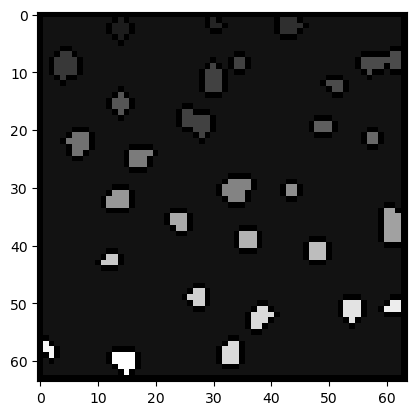

In [118]:
plt.imshow(markers)

In [112]:
_,cnts = np.unique(markers,return_counts=True)
np.std(cnts[1:])

624.1198832742191

In [89]:
sure_bg = np.uint8(sure_fg)

array([[ 0.00000000e+00, -6.03084112e-17, -6.57909941e-17, ...,
        -7.42661872e-17,  2.44203039e-17,  1.12141629e-16],
       [ 2.74129142e-16,  1.53512319e-16,  8.77213254e-17, ...,
        -7.29697510e-16, -7.95488504e-16, -1.00382665e-15],
       [ 2.63163976e-16,  3.07024639e-16,  0.00000000e+00, ...,
        -2.07138833e-16, -1.96173667e-16,  3.95773949e-17],
       ...,
       [ 1.98955011e-01,  4.03134967e-01,  3.22796414e-01, ...,
         5.21669473e-16,  6.00000159e-16,  4.57453006e-16],
       [ 1.50227216e-01,  2.47682806e-01,  2.25340824e-01, ...,
         7.88380424e-16,  2.47572881e-16,  8.30953961e-17],
       [ 1.23841403e-01,  2.04179956e-01,  2.47682806e-01, ...,
         2.31715580e-16, -4.16262981e-17, -5.67104662e-17]])

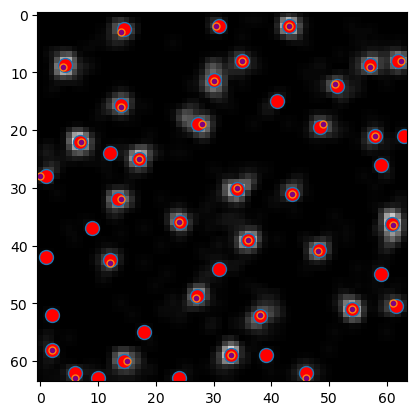

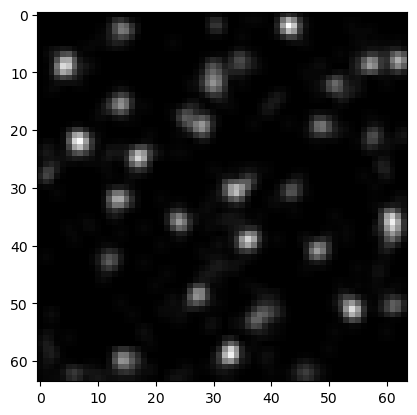

In [82]:
plt.imshow(nimg)
vxs = readVXSfromLoc(loc,sm=1)

plt.plot(
    vxs[0][:, 0],
    vxs[0][:, 1],
    "o",
    markerfacecolor="red",
    markersize=10,
)

vxs = readVXSfromLoc(loc,sm=3)
plt.plot(
    vxs[0][:, 0],
    vxs[0][:, 1],
    ".",
    markerfacecolor="purple",
    markersize=10,
)
plt.figure()
plt.imshow(nimg)

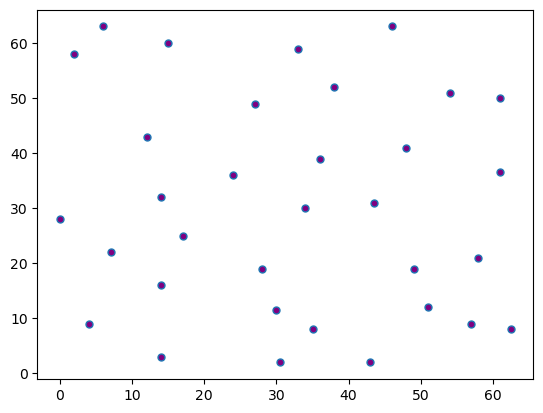

In [73]:
plt.plot(
    vxs[0][:, 0],
    vxs[0][:, 1],
    ".",
    markerfacecolor="purple",
    markersize=10,
)

In [70]:
len(vxs[0])

46

In [146]:
stats_all=stats_randr.extend(stats_2dr)

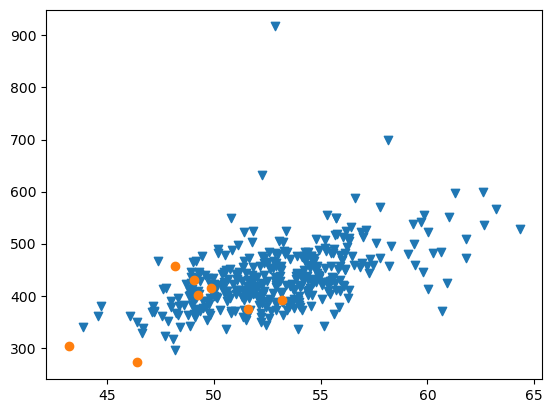

In [144]:
plt.scatter(np.array(stats_randr)[:,2],np.array(stats_randr)[:,5],marker="v")
plt.scatter(np.array(stats_2dr)[:,2],np.array(stats_2dr)[:,5],marker="o")

In [120]:
a = [ x for x in stats_randr if x[3] > 0.67 and x[5] < 5000 ]

In [121]:
len(a)

9

Text(0, 0.5, '%Area')

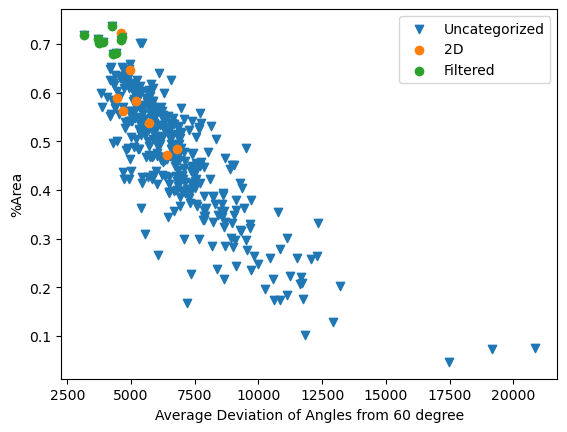

In [124]:
plt.scatter(np.array(stats_randr)[:,5],np.array(stats_randr)[:,3],marker="v")
plt.scatter(np.array(stats_2dr)[:,5],np.array(stats_2dr)[:,3],marker="o")
plt.scatter(np.array(a)[:,5],np.array(a)[:,3],marker="o")
plt.legend(["Uncategorized","2D","Filtered"])
plt.xlabel(labels[5])
plt.ylabel(labels[3])


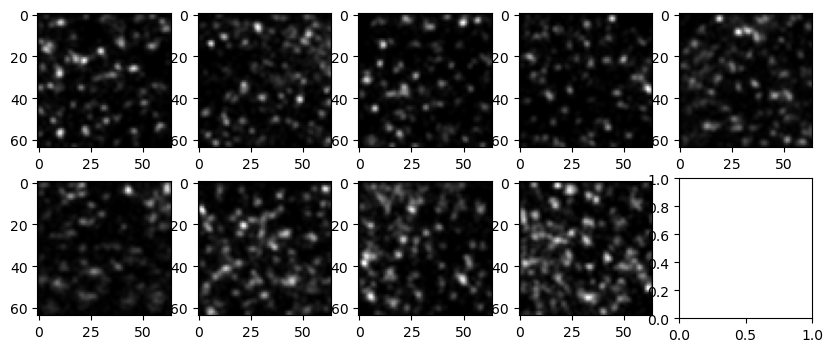

In [125]:
fig, axs = plt.subplots(2, 5, figsize=(10, 4))
ji=1
for i in a:
    j = stats_randr.index(i)
    plt.subplot(2, 5, ji)
    plotSub(test_rand[j])
    ji+=1

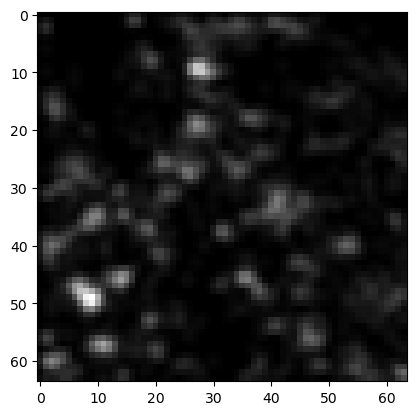

In [91]:
def plotSub(sub_path):
    smlm = pd.read_csv(sub_path, header=0)
    xc=np.array(smlm["Xc"].tolist()).astype(np.int32)
    yc=np.array(smlm["Yc"].tolist()).astype(np.int32)
    img = grid2D(np.zeros([grid_size,grid_size], dtype=np.int32),xc,yc,grid_size,grid_size,len(xc))
    g = cv2.getGaussianKernel(3, sigma=1)
    kernel = g*g.T
    nimg = scipy.signal.fftconvolve(img, kernel, mode='same')
    plt.figure()
    plt.imshow(nimg)

plotSub(test_rand[0])

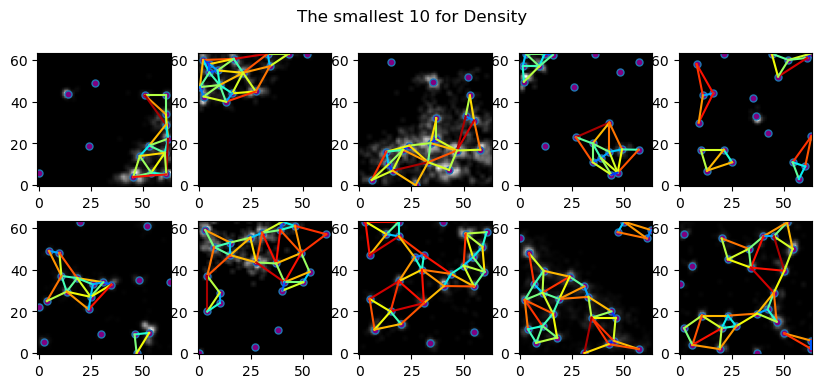

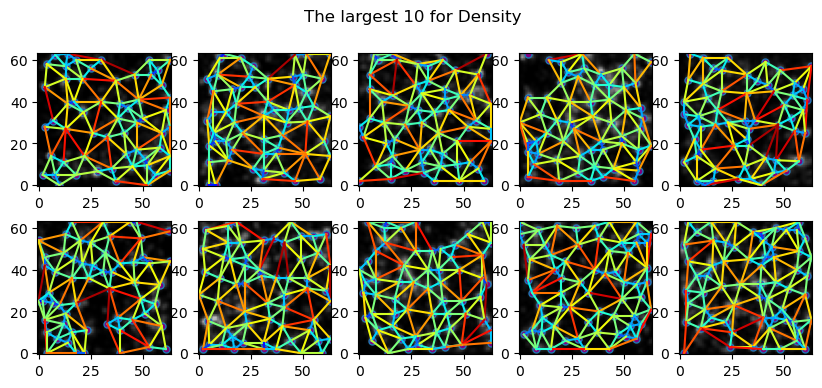

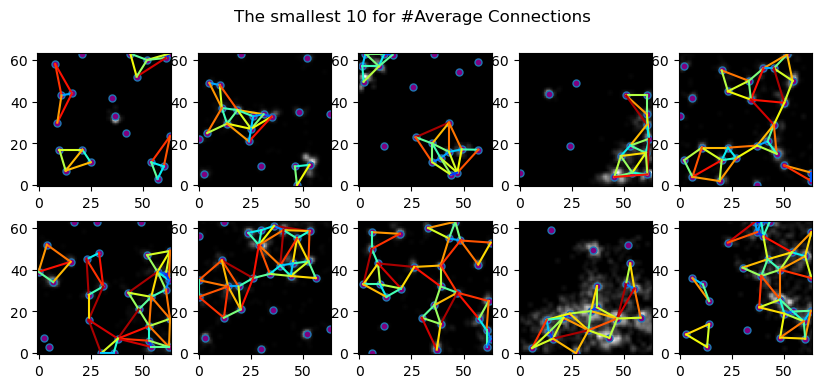

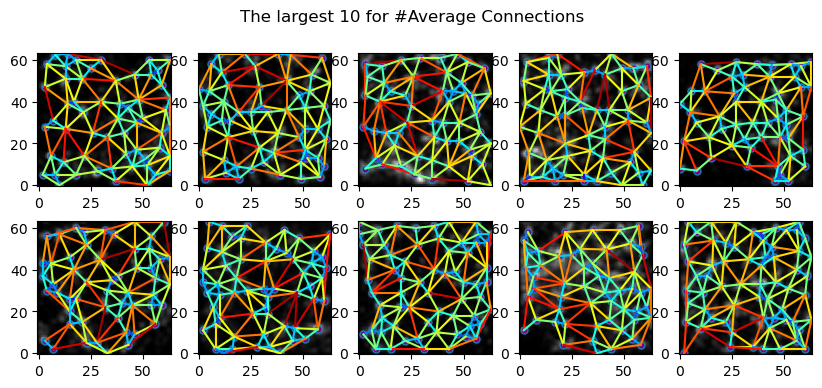

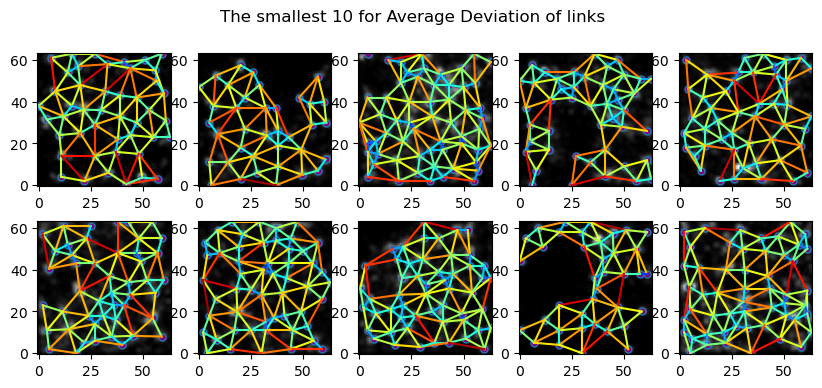

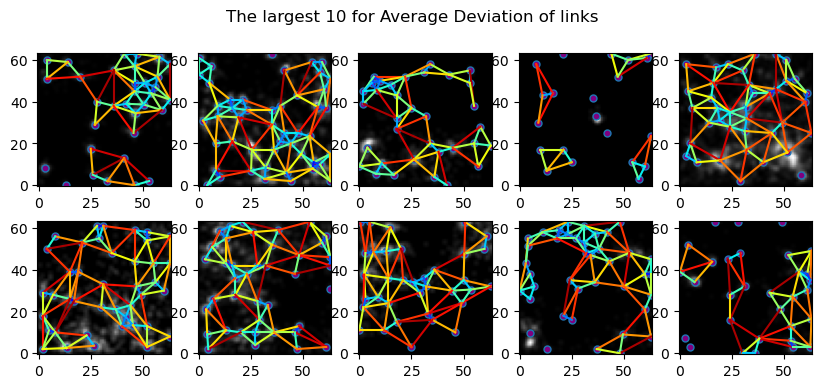

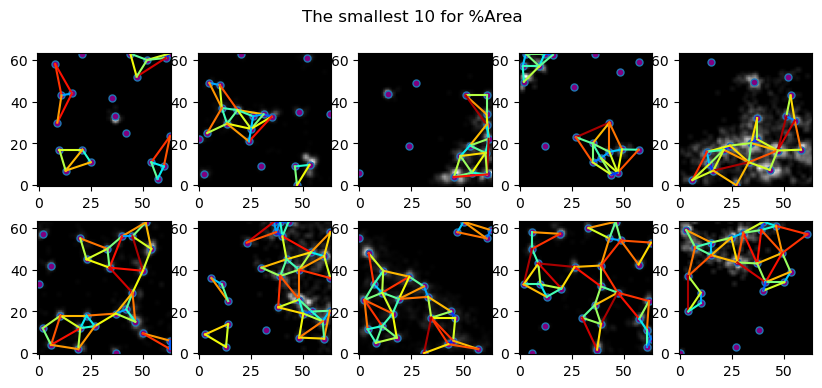

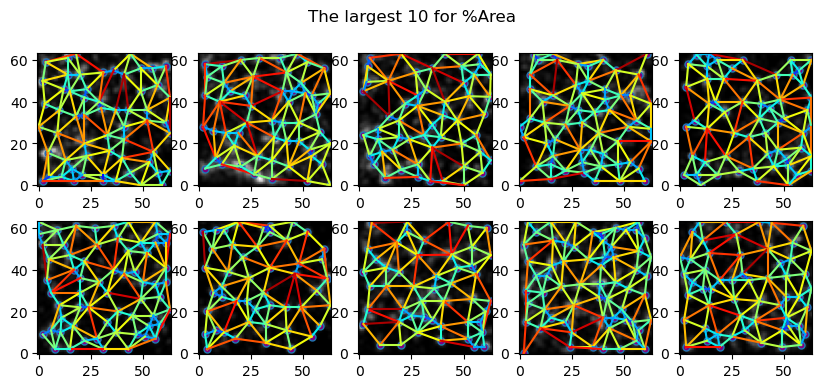

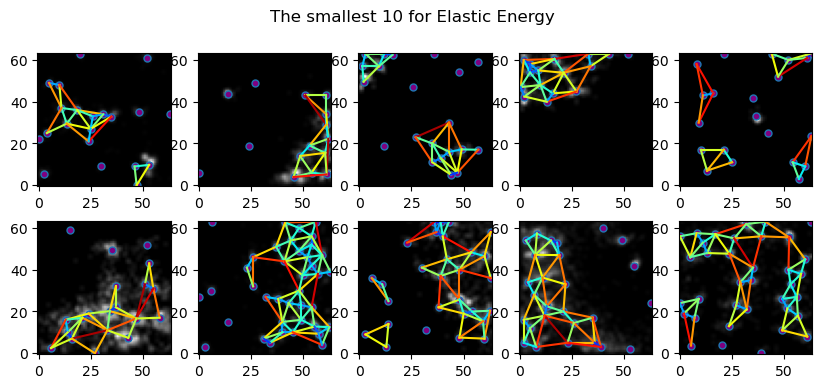

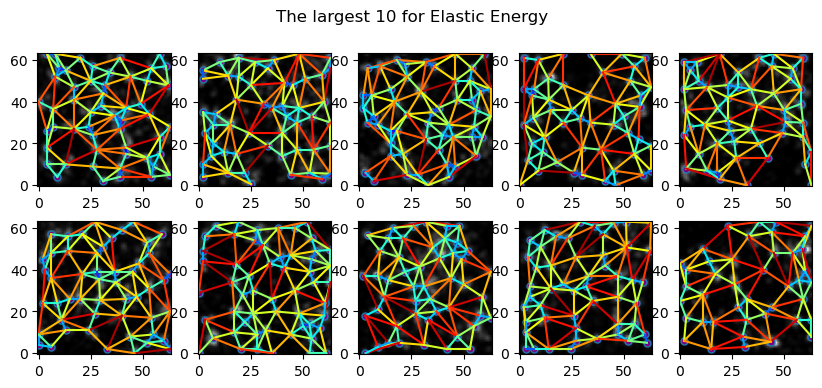

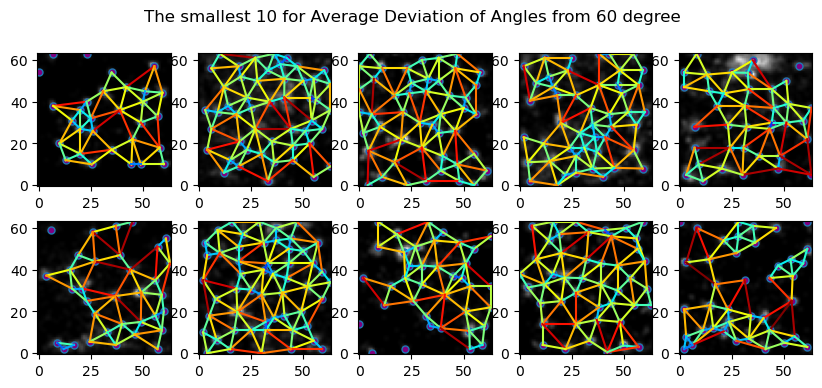

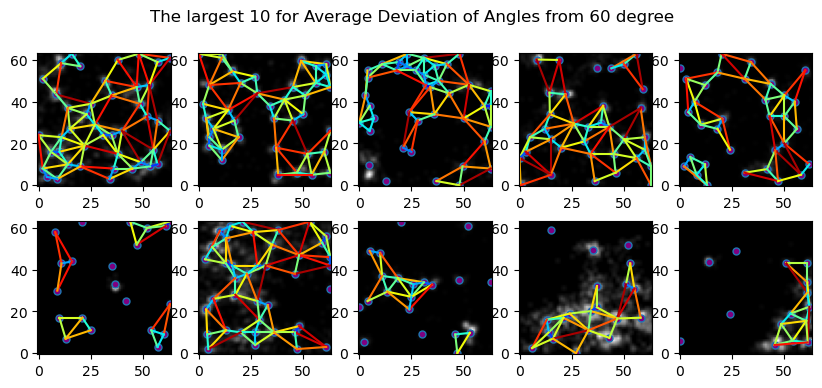

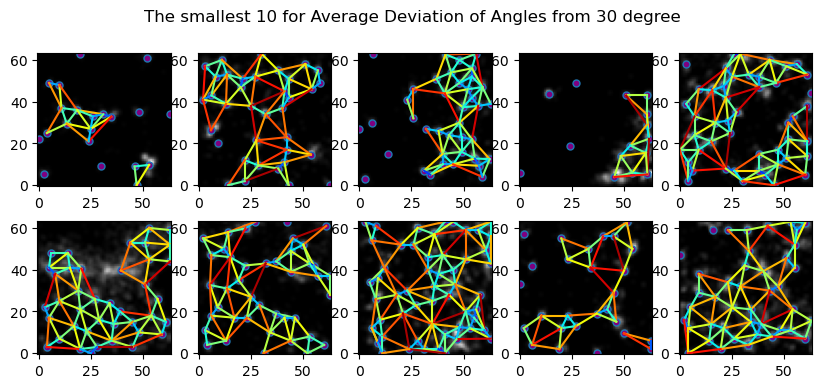

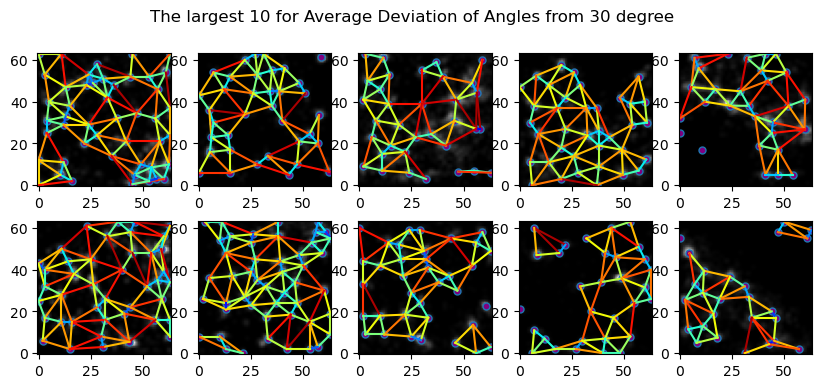

In [143]:


for i in range(7):
    tmp_rand = np.array(stats_randr)[:,i]
    tmp_idx = tmp_rand.argsort()
    top_10 = tmp_idx[:10]
    bot_10 = tmp_idx[-10:]
    fig, axs = plt.subplots(2, 5, figsize=(10, 4))
    ji=1
    for j in top_10:
        plt.subplot(2, 5, ji)
        plotSub(test_rand[j])
        visualizeSub(test_rand[j],thre=thre)
        ji+=1
    fig.suptitle("The smallest 10 for "+labels[i] )
    fig, axs = plt.subplots(2, 5, figsize=(10,4))
    ji=1
    for j in bot_10:
        plt.subplot(2, 5, ji)
        plotSub(test_rand[j])
        visualizeSub(test_rand[j],thre=thre)
        ji+=1
    fig.suptitle("The largest 10 for "+labels[i] )
    



In [ ]:
#vxs_1D = sim1D()
#stats_1D = statsForVXS(vxs_1D, plot=0, thre=[140,220])

vxs_2D = sim2D(size=16*64,space=93)
stats_2D = statsForVXS(vxs_2D, plot=0, thre=[140,220])
for i in range(10):
    vxs=jitter(vxs_2D)
    stats_2ds.append(statsForVXS(vxs, plot=0, thre=thre))

In [ ]:
stats_1ds=[]
thre=[50,220]
vxs_1D = sim1D(size=64*16, spacex=60, spacey=187)
#stats_1D = statsForVXS(vxs_1D, plot=0, thre=[140,220])
for i in range(10):
    vxs=jitter(vxs_1D)
    stats_1ds.append(statsForVXS(vxs, plot=0, thre=thre))

In [ ]:
a=genPic(np.zeros([64,64]),vxs_1D,point=9)
plt.imshow(a)

In [ ]:
thre=[50,220]
# for i in range(len(test_2d)):
#     vxs = readVXSfromLoc(test_2d[i])
#     stats_2dr.append(statsForVXS(vxs*16, plot=1, thre=thre))

for i in range(len(test_1d)):
    plt.figure()
    vxs = readVXSfromLoc(test_1d[i], plot=1)
    #stats_1dr.append(statsForVXS(vxs*16, plot=1, thre=thre))

In [ ]:
stats_2dd=[]
for i in range(10):
    vxs = simRandD(box=64*16, d=100, n=56)
    stats_2dd.append(statsForVXS(vxs, plot=0, thre=thre))

In [ ]:
vxs = simRandD(box=64*16, d=100, n=56)
visualize(vxs,generateLinks(vxs,plot=0,thre=[50,200]))

In [ ]:
#sns.boxplot(np.array(stats_2dr)[:,4])
for i in range(5):
    plt.figure(figsize=[10,5])
    df = pd.Series(np.array(stats_1dr)[:,i], name="1D").to_frame().join(pd.Series(np.array(stats_2dr)[:,i], name="2D"))
    df = df.join(pd.Series(np.array(stats_randr)[:,i], name="Rand"))
    df = df.join(pd.Series(np.array(stats_1ds)[:,i], name="Simulated 1D"))
    df = df.join(pd.Series(np.array(stats_2ds)[:,i], name="Simulated 2D"))
    df = df.join(pd.Series(np.array(stats_rands)[:,i], name="Simulated Rand"))

    sns.boxplot(data=df, width = 0.2) 
    plt.title(labels[i]+" comparisons in real data")